---
# Matminer introduction
---

https://workshop.materialsproject.org/lessons/08_ml_matminer/matminer-notes/


https://hackingmaterials.lbl.gov/matminer/

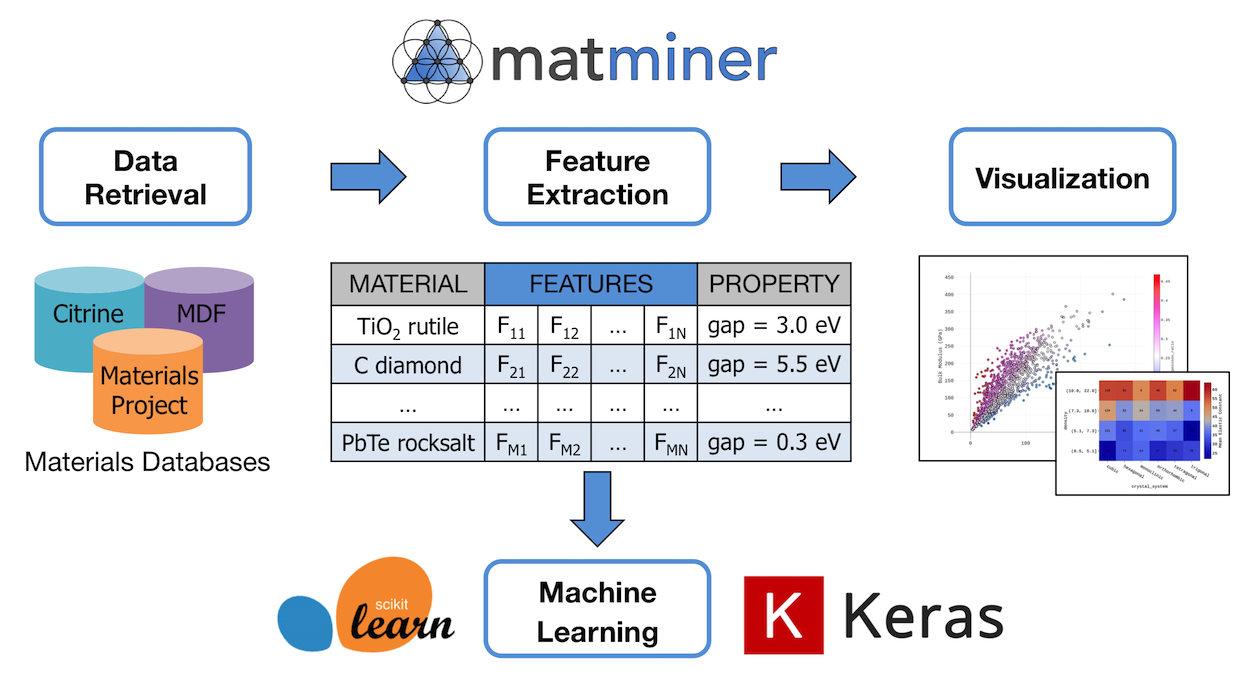

## Installation Guide

To set up the environment for `matminer` on Ubuntu, execute the following commands in a terminal:

```bash
# Step 1: Create a new conda environment with Python 3.11
conda create -n matminer_093 python=3.11

# Step 2: Activate the newly created environment
conda activate matminer_093

# Step 3: Install matminer from the conda-forge channel
conda install -c conda-forge matminer

# Step 4: Install ipykernel for Jupyter support
conda install -c anaconda ipykernel

# Step 5: Install pytorch
conda install pytorch::pytorch

# Step 6: Install pytorch
conda install anaconda::scikit-learn

# Step 7: Install Jupyter
conda install -c anaconda jupyter

# Step 8: Link the environment to Jupyter
python -m ipykernel install --user --name=matminer_093


### Selecting the Kernel in Jupyter Notebook

1. **Create or Open a Notebook:**
   - Launch Jupyter Notebook in your terminal by running:
     ```bash
     jupyter notebook
     ```
   - In the Jupyter interface, either create a new notebook or open an existing one.

2. **Select the Kernel:**
   - Navigate to the **top-right corner** of the notebook interface.
   - From the kernel selection dropdown, choose `matminer_093` from the list.

---

### Working with Jupyter in Visual Studio Code

1. **Open or Create a Notebook in Visual Studio Code:**
   - Open your project folder in VS Code.
   - Create a new notebook (`.ipynb`) file or open an existing one.

2. **Select the Kernel:**
   - In the notebook interface in VS Code, go to the **top-right corner**.
   - From the kernel selection dropdown, choose `matminer_093` as the kernel.




## Objective
Develop a machine learning model to classify crystalline structures as metallic or non-metallic using the `matbench_mp_is_metal` dataset. You will use the Matminer package to extract features from the composition and structure of the materials and then apply a custom neural network for classification.

## Dataset
- Matbench `matbench_mp_is_metal`: A dataset for predicting DFT metallicity from structure.

## Tools and Libraries
- Python
- Matminer for feature extraction
- Costum  neural network
- Scikit-learn for additional machine learning utilities

## Tasks

### 1. Data Preparation
- Load the `matbench_mp_is_metal` dataset.
- Explore the dataset to understand its structure and contents.







## Predicting Metallicity of Crystalline Structures

## 1. Data Preparation

### Load your data

In [1]:
import matminer
from matminer.datasets import get_available_datasets

get_available_datasets()

boltztrap_mp: Effective mass and thermoelectric properties of 8924 compounds in The  Materials Project database that are calculated by the BoltzTraP software package run on the GGA-PBE or GGA+U density functional theory calculation results. The properties are reported at the temperature of 300 Kelvin and the carrier concentration of 1e18 1/cm3.

brgoch_superhard_training: 2574 materials used for training regressors that predict shear and bulk modulus.

castelli_perovskites: 18,928 perovskites generated with ABX combinatorics, calculating gllbsc band gap and pbe structure, and also reporting absolute band edge positions and heat of formation.

citrine_thermal_conductivity: Thermal conductivity of 872 compounds measured experimentally and retrieved from Citrine database from various references. The reported values are measured at various temperatures of which 295 are at room temperature.

dielectric_constant: 1,056 structures with dielectric properties, calculated with DFPT-PBE.

double_

['boltztrap_mp',
 'brgoch_superhard_training',
 'castelli_perovskites',
 'citrine_thermal_conductivity',
 'dielectric_constant',
 'double_perovskites_gap',
 'double_perovskites_gap_lumo',
 'elastic_tensor_2015',
 'expt_formation_enthalpy',
 'expt_formation_enthalpy_kingsbury',
 'expt_gap',
 'expt_gap_kingsbury',
 'flla',
 'glass_binary',
 'glass_binary_v2',
 'glass_ternary_hipt',
 'glass_ternary_landolt',
 'heusler_magnetic',
 'jarvis_dft_2d',
 'jarvis_dft_3d',
 'jarvis_ml_dft_training',
 'm2ax',
 'matbench_dielectric',
 'matbench_expt_gap',
 'matbench_expt_is_metal',
 'matbench_glass',
 'matbench_jdft2d',
 'matbench_log_gvrh',
 'matbench_log_kvrh',
 'matbench_mp_e_form',
 'matbench_mp_gap',
 'matbench_mp_is_metal',
 'matbench_perovskites',
 'matbench_phonons',
 'matbench_steels',
 'mp_all_20181018',
 'mp_nostruct_20181018',
 'phonon_dielectric_mp',
 'piezoelectric_tensor',
 'ricci_boltztrap_mp_tabular',
 'steel_strength',
 'superconductivity2018',
 'tholander_nitrides',
 'ucsb_thermoe

In [2]:
from matminer.datasets import load_dataset
from matminer.datasets import get_all_dataset_info

df = load_dataset("matbench_mp_is_metal")


### Undestandaing you data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 106113 entries, 0 to 106112
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   structure  106113 non-null  object
 1   is_metal   106113 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 1.7+ MB


- Dataset has 2 columns and 106113 rows

In [5]:
df.head()

,structure,is_metal
0,"[[-0.00812638 0.02476014 -0.01698117] K, [-0....",False
1,"[[0. 1.78463544 1.78463544] Cr, [1.784...",True
2,"[[-2.13764909 -2.12540569 -2.14704542] Cs, [-6...",True
3,"[[0. 0. 0.] Si, [ 4.55195829 4.55195829 -4.55...",False
4,"[[0. 2.655 2.655] Ca, [2.655 0. 2.655] C...",False


In [6]:
df.columns

Index(['structure', 'is_metal'], dtype='object')

In [7]:
df.iloc[0]['structure']

Structure Summary
Lattice
    abc : 6.406363657202162 6.406467137124612 7.044309333428201
 angles : 117.04760378769878 117.05264082569089 89.99849645521215
 volume : 221.3900463039157
      A : -1.51380397 -5.48507039 -2.94344962
      B : -5.69037336 -0.0091356 2.94319363
      C : 1.47686364 5.53453311 -4.10001354
    pbc : True True True
PeriodicSite: K (-0.008126, 0.02476, -0.01698) [0.000888, 0.002582, 0.005358]
PeriodicSite: K (-0.7711, -2.737, -1.501) [0.5046, 0.002727, 0.005671]
PeriodicSite: K (-2.86, 0.002464, -2.017) [0.4965, 0.4985, 0.4933]
PeriodicSite: K (-5.685, -0.001713, -0.557) [0.4967, 0.995, 0.4936]
PeriodicSite: Mn (-2.853, 0.008701, -5.518) [0.9933, 0.4933, 0.9868]
PeriodicSite: Mn (0.7133, 2.801, -2.099) [0.005896, 0.005967, 0.512]
PeriodicSite: Mn (-2.132, 2.796, -0.6253) [0.005704, 0.506, 0.5116]
PeriodicSite: Mn (-2.098, 2.751, -4.048) [0.4937, 0.4935, 0.9871]
PeriodicSite: O (-3.818, 1.709, -0.4023) [0.1909, 0.7497, 0.4992]
PeriodicSite: O (-3.591, 1.414, -4.

In [8]:
df.iloc[0]['structure'].composition

Composition('K4 Mn4 O8')

In [9]:
df.iloc[0]['structure'].composition.formula

'K4 Mn4 O8'

In [10]:
# Extract the composition
composition = df.iloc[0]['structure'].composition
print("composition:", composition )
# Convert the composition to a string
composition_str = composition.formula
print("composition_str:", composition_str )
# Optionally, you can get a reduced formula, which is a more compact representation
reduced_formula = composition.reduced_formula
print("reduced_formula:", reduced_formula )

composition: K4 Mn4 O8
composition_str: K4 Mn4 O8
reduced_formula: KMnO2


### Target

In [11]:
df['is_metal']

0         False
1          True
2          True
3         False
4         False
          ...  
106108    False
106109    False
106110    False
106111    False
106112    False
Name: is_metal, Length: 106113, dtype: bool

In [ ]:
import plotly.express as px

# Count the occurrences of each unique value in the column
counts = df['is_metal'].value_counts()

# Create a Pie Chart
fig = px.pie(counts, values='count', names=counts.index)

# Show the plot
fig.show()

In [14]:
# Create a Donut Chart
fig = px.pie(counts, values='count', names=counts.index, hole=0.4)
# Show the plot
fig.show()

## 2. Feature Extraction

### take a sample of you datset with  1000 Entries

In [15]:
# Take a sample of N rows from the DataFrame
sample_df = df.sample(n=1000)

### Composition Featurizers

#### Using Pymatgen to create a new columm with formula

In [16]:


## write your code here
from pymatgen.core import Structure
def get_formula(structure):
    """Extracts the formula from a Pymatgen Structure object and returns it as a string."""
    if structure is not None and isinstance(structure, Structure):
        return structure.composition.formula
    else:
        return None

# Apply the function to the 'structure' column to create a new 'composition' column
sample_df['formula'] = sample_df['structure'].apply(get_formula)
sample_df.head()

,structure,is_metal,formula
1257,"[[-1.32646049 3.93374147 3.91032602] Ca, [0....",False,Ca3 Cr6 Fe4 O24
50131,"[[-4.60712611 0.76456867 -4.79693133] Li, [-3...",False,Li32 Ti3 Cr13 O48
87673,"[[6.36610671 4.8602015 2.45516863] Sn, [ 6.36...",True,Cs8 Sn46
79069,"[[8.53650482 9.0065471 3.94795634] K, [ 4.268...",False,K10 Mo16 As2 H12 O64
5174,"[[-2.23555614 2.36377528 -4.5440399 ] Fe, [-2...",True,Fe8 O14 F2


#### Q2  Create  your Composittions Features

In [17]:
from matminer.featurizers.conversions import StrToComposition
## Write your code here  take advantage of the Matminer Jupyther Notebook
sample_df = StrToComposition().featurize_dataframe(sample_df, "formula")
sample_df.head()

c:\Users\alexe\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

StrToComposition: 100%|██████████| 1000/1000 [00:08<00:00, 112.54it/s]


,structure,is_metal,formula,composition
1257,"[[-1.32646049 3.93374147 3.91032602] Ca, [0....",False,Ca3 Cr6 Fe4 O24,"(Ca, Cr, Fe, O)"
50131,"[[-4.60712611 0.76456867 -4.79693133] Li, [-3...",False,Li32 Ti3 Cr13 O48,"(Li, Ti, Cr, O)"
87673,"[[6.36610671 4.8602015 2.45516863] Sn, [ 6.36...",True,Cs8 Sn46,"(Cs, Sn)"
79069,"[[8.53650482 9.0065471 3.94795634] K, [ 4.268...",False,K10 Mo16 As2 H12 O64,"(K, Mo, As, H, O)"
5174,"[[-2.23555614 2.36377528 -4.5440399 ] Fe, [-2...",True,Fe8 O14 F2,"(Fe, O, F)"


In [18]:
from matminer.featurizers.composition import ElementProperty
## Write your code here  take advantage of the Matminer Jupyther Notebook
ep_feat = ElementProperty.from_preset(preset_name="magpie")
sample_df = ep_feat.featurize_dataframe(sample_df, col_id="composition")  # input the "composition" column to the featurizer
sample_df.head()

c:\Users\alexe\AppData\Local\Programs\Python\Python312\Lib\site-packages\matminer\utils\data.py:326: UserWarning:

MagpieData(impute_nan=False):
In a future release, impute_nan will be set to True by default.
                    This means that features that are missing or are NaNs for elements
                    from the data source will be replaced by the average of that value
                    over the available elements.
                    This avoids NaNs after featurization that are often replaced by
                    dataset-dependent averages.

ElementProperty: 100%|██████████| 1000/1000 [00:45<00:00, 22.18it/s]


,structure,is_metal,formula,composition,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,...,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
1257,"[[-1.32646049 3.93374147 3.91032602] Ca, [0....",False,Ca3 Cr6 Fe4 O24,"(Ca, Cr, Fe, O)",8.0,26.0,18.0,13.513514,7.152666,8.0,...,2.110663,2.281798e-01,0.407023,0.0,12.0,229.0,217.0,87.918919,98.489408,12.0
50131,"[[-4.60712611 0.76456867 -4.79693133] Li, [-3...",False,Li32 Ti3 Cr13 O48,"(Li, Ti, Cr, O)",3.0,24.0,21.0,8.937500,4.895833,8.0,...,0.000023,7.041667e-07,0.000001,0.0,12.0,229.0,217.0,119.406250,107.406250,12.0
87673,"[[6.36610671 4.8602015 2.45516863] Sn, [ 6.36...",True,Cs8 Sn46,"(Cs, Sn)",50.0,55.0,5.0,50.740741,1.262003,50.0,...,0.000000,0.000000e+00,0.000000,0.0,141.0,229.0,88.0,154.037037,22.211248,141.0
79069,"[[8.53650482 9.0065471 3.94795634] K, [ 4.268...",False,K10 Mo16 As2 H12 O64,"(K, Mo, As, H, O)",1.0,42.0,41.0,13.961538,10.328402,8.0,...,0.000000,0.000000e+00,0.000000,0.0,12.0,229.0,217.0,90.211538,96.260355,12.0
5174,"[[-2.23555614 2.36377528 -4.5440399 ] Fe, [-2...",True,Fe8 O14 F2,"(Fe, O, F)",8.0,26.0,18.0,14.083333,7.944444,8.0,...,2.110663,7.035543e-01,0.938072,0.0,12.0,229.0,217.0,84.583333,96.277778,12.0


### Structure Featurizers
####   Create  your Density Features

In [19]:
# write your code here

from matminer.featurizers.structure import DensityFeatures

df_feat = DensityFeatures()
sample_df = df_feat.featurize_dataframe(sample_df, "structure")  # input the structure column to the featurizer
sample_df.head()

DensityFeatures: 100%|██████████| 1000/1000 [01:27<00:00, 11.41it/s]


,structure,is_metal,formula,composition,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,...,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,density,vpa,packing fraction
1257,"[[-1.32646049 3.93374147 3.91032602] Ca, [0....",False,Ca3 Cr6 Fe4 O24,"(Ca, Cr, Fe, O)",8.0,26.0,18.0,13.513514,7.152666,8.0,...,0.0,12.0,229.0,217.0,87.918919,98.489408,12.0,3.355934,13.902417,0.408139
50131,"[[-4.60712611 0.76456867 -4.79693133] Li, [-3...",False,Li32 Ti3 Cr13 O48,"(Li, Ti, Cr, O)",3.0,24.0,21.0,8.937500,4.895833,8.0,...,0.0,12.0,229.0,217.0,119.406250,107.406250,12.0,3.526252,8.876773,0.746301
87673,"[[6.36610671 4.8602015 2.45516863] Sn, [ 6.36...",True,Cs8 Sn46,"(Cs, Sn)",50.0,55.0,5.0,50.740741,1.262003,50.0,...,0.0,141.0,229.0,88.0,154.037037,22.211248,141.0,5.248617,38.222402,0.569958
79069,"[[8.53650482 9.0065471 3.94795634] K, [ 4.268...",False,K10 Mo16 As2 H12 O64,"(K, Mo, As, H, O)",1.0,42.0,41.0,13.961538,10.328402,8.0,...,0.0,12.0,229.0,217.0,90.211538,96.260355,12.0,3.261729,15.233395,0.455588
5174,"[[-2.23555614 2.36377528 -4.5440399 ] Fe, [-2...",True,Fe8 O14 F2,"(Fe, O, F)",8.0,26.0,18.0,14.083333,7.944444,8.0,...,0.0,12.0,229.0,217.0,84.583333,96.277778,12.0,4.555784,10.763831,0.409034


In [20]:
sample_df.describe()

,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData range MendeleevNumber,MagpieData mean MendeleevNumber,...,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,density,vpa,packing fraction
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,13.959000,51.142000,37.183000,26.717479,11.676060,20.251000,25.078000,84.120000,59.042000,65.916894,...,0.028424,65.169000,220.915000,155.746000,127.750669,63.063401,84.463000,5.618626,17.919468,0.554467
std,13.674367,21.900262,20.122486,16.578382,7.566105,19.555521,24.591109,10.557797,26.642336,13.499752,...,0.198800,76.597988,17.651043,79.292703,54.722003,35.305905,88.406744,2.884232,8.209048,0.203507
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000,2.000000,...,0.000000,2.000000,15.000000,0.000000,13.434783,0.000000,2.000000,0.039976,5.705158,0.001563
25%,5.000000,28.000000,22.000000,13.300000,5.677118,8.000000,3.000000,80.000000,37.000000,58.750000,...,0.000000,12.000000,225.000000,84.000000,85.833333,27.500000,12.000000,3.495752,12.280927,0.405990
50%,8.000000,52.000000,33.000000,21.866667,9.887618,8.000000,13.000000,87.000000,64.000000,66.558333,...,0.000000,12.000000,229.000000,213.000000,111.272727,74.102857,15.000000,4.793778,15.362836,0.574006
75%,16.000000,71.000000,51.250000,36.850000,16.458333,31.000000,46.000000,89.000000,85.000000,75.762500,...,0.000000,141.000000,229.000000,217.000000,183.291925,93.361111,194.000000,7.110607,21.808721,0.710232
max,71.000000,94.000000,89.000000,79.000000,44.000000,91.000000,92.000000,96.000000,94.000000,92.750000,...,2.110663,229.000000,229.000000,227.000000,229.000000,112.166667,229.000000,17.477700,90.495198,1.372097


In [21]:
# Print the info of the DataFrame
sample_df.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1257 to 66031
Data columns (total 139 columns):
 #    Column                                Dtype  
---   ------                                -----  
 0    structure                             object 
 1    is_metal                              bool   
 2    formula                               object 
 3    composition                           object 
 4    MagpieData minimum Number             float64
 5    MagpieData maximum Number             float64
 6    MagpieData range Number               float64
 7    MagpieData mean Number                float64
 8    MagpieData avg_dev Number             float64
 9    MagpieData mode Number                float64
 10   MagpieData minimum MendeleevNumber    float64
 11   MagpieData maximum MendeleevNumber    float64
 12   MagpieData range MendeleevNumber      float64
 13   MagpieData mean MendeleevNumber       float64
 14   MagpieData avg_dev MendeleevNumber    float64
 15   Mag

In [22]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1257 to 66031
Columns: 139 entries, structure to packing fraction
dtypes: bool(1), float64(135), object(3)
memory usage: 1.1+ MB


### Drop columns with low standard deviation in Pandas Dataframe

In [23]:
import pandas as pd
# Select only numerical columns (float64 and int64 types)
numerical_df = list(sample_df.select_dtypes(include=['float64', 'int64']))

In [24]:
threshold = 0.6
sample_df.drop(sample_df[numerical_df].std()[sample_df[numerical_df].std() < threshold].index.values, axis=1)

,structure,is_metal,formula,composition,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,...,MagpieData maximum GSmagmom,MagpieData range GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,density,vpa
1257,"[[-1.32646049 3.93374147 3.91032602] Ca, [0....",False,Ca3 Cr6 Fe4 O24,"(Ca, Cr, Fe, O)",8.0,26.0,18.0,13.513514,7.152666,8.0,...,2.110663,2.110663,12.0,229.0,217.0,87.918919,98.489408,12.0,3.355934,13.902417
50131,"[[-4.60712611 0.76456867 -4.79693133] Li, [-3...",False,Li32 Ti3 Cr13 O48,"(Li, Ti, Cr, O)",3.0,24.0,21.0,8.937500,4.895833,8.0,...,0.000023,0.000023,12.0,229.0,217.0,119.406250,107.406250,12.0,3.526252,8.876773
87673,"[[6.36610671 4.8602015 2.45516863] Sn, [ 6.36...",True,Cs8 Sn46,"(Cs, Sn)",50.0,55.0,5.0,50.740741,1.262003,50.0,...,0.000000,0.000000,141.0,229.0,88.0,154.037037,22.211248,141.0,5.248617,38.222402
79069,"[[8.53650482 9.0065471 3.94795634] K, [ 4.268...",False,K10 Mo16 As2 H12 O64,"(K, Mo, As, H, O)",1.0,42.0,41.0,13.961538,10.328402,8.0,...,0.000000,0.000000,12.0,229.0,217.0,90.211538,96.260355,12.0,3.261729,15.233395
5174,"[[-2.23555614 2.36377528 -4.5440399 ] Fe, [-2...",True,Fe8 O14 F2,"(Fe, O, F)",8.0,26.0,18.0,14.083333,7.944444,8.0,...,2.110663,2.110663,12.0,229.0,217.0,84.583333,96.277778,12.0,4.555784,10.763831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77766,"[[-14.2324787 -10.75073565 -1.68626523] Rb, ...",False,Rb4 Zr24 B4 Cl60,"(Rb, Zr, B, Cl)",5.0,40.0,35.0,23.347826,9.875236,17.0,...,0.000000,0.000000,64.0,229.0,165.0,109.521739,59.376181,64.0,2.889822,29.365837
45130,"[[0.30812082 6.92872559 6.14173753] Li, [2.650...",False,Li3 V2 P4 H2 O16,"(Li, V, P, H, O)",1.0,23.0,22.0,9.074074,3.818930,8.0,...,0.000000,0.000000,2.0,229.0,227.0,64.185185,80.274348,12.0,2.938820,10.560050
67653,[[0. 0. 0.] Na],True,Na1,(Na),11.0,11.0,0.0,11.000000,0.000000,11.0,...,0.000000,0.000000,229.0,229.0,0.0,229.000000,0.000000,229.0,1.050961,36.324293
104619,"[[2.65920719 2.84153417 5.99131079] K, [6.1269...",False,K12 Zr4 H8 S4 O20 F20,"(K, Zr, H, S, O, F)",1.0,40.0,39.0,11.764706,6.373702,8.0,...,0.000000,0.000000,12.0,229.0,217.0,86.705882,88.089965,12.0,2.670334,15.275075


In [25]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1257 to 66031
Columns: 139 entries, structure to packing fraction
dtypes: bool(1), float64(135), object(3)
memory usage: 1.1+ MB


### Finding Correlation Matrix

The correlation matrix measures the linear relationship between pairs of features in a dataset. It provides an indication of how strongly and in what direction two features are related. A correlation value ranges from -1 to 1, where -1 indicates a strong negative correlation, 0 indicates no correlation, and 1 indicates a strong positive correlation.

In [26]:
import plotly.express as px

# exclude the target and numerical Feature
excluded = ["formula", "structure", "composition",]
sample_df_num = sample_df.drop(excluded, axis=1)

# Calculate the correlation matrix
corr = sample_df_num.corr()

# Create a heatmap using Plotly
fig = px.imshow(corr,
                text_auto=True,
                aspect="auto",
                color_continuous_scale='RdBu',
                labels=dict(x="Feature", y="Feature", color="Correlation"))

# Update layout for better visualization
fig.update_layout(width=800, height=600)

# Show the plot
fig.show()

In [27]:
import numpy as np
# Create correlation matrix
corr_matrix = sample_df_num.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

print('features with correlation greater than 0.9:',to_drop )
# Drop features
sample_df.drop(to_drop, axis=1, inplace=True)

features with correlation greater than 0.9: ['MagpieData minimum AtomicWeight', 'MagpieData maximum AtomicWeight', 'MagpieData range AtomicWeight', 'MagpieData mean AtomicWeight', 'MagpieData avg_dev AtomicWeight', 'MagpieData mode AtomicWeight', 'MagpieData minimum Row', 'MagpieData mean Row', 'MagpieData mode Row', 'MagpieData range NsValence', 'MagpieData range NpValence', 'MagpieData range NfValence', 'MagpieData minimum NsUnfilled', 'MagpieData range NsUnfilled', 'MagpieData range NpUnfilled', 'MagpieData range NdUnfilled', 'MagpieData range NfUnfilled', 'MagpieData range NUnfilled', 'MagpieData range GSvolume_pa', 'MagpieData range GSbandgap', 'MagpieData range GSmagmom', 'MagpieData range SpaceGroupNumber']


In [28]:
sample_df.describe()

,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData range MendeleevNumber,MagpieData mean MendeleevNumber,...,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,density,vpa,packing fraction
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,13.959000,51.142000,37.183000,26.717479,11.676060,20.251000,25.078000,84.120000,59.042000,65.916894,...,0.077693,0.028424,65.169000,220.915000,127.750669,63.063401,84.463000,5.618626,17.919468,0.554467
std,13.674367,21.900262,20.122486,16.578382,7.566105,19.555521,24.591109,10.557797,26.642336,13.499752,...,0.191752,0.198800,76.597988,17.651043,54.722003,35.305905,88.406744,2.884232,8.209048,0.203507
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000,2.000000,...,0.000000,0.000000,2.000000,15.000000,13.434783,0.000000,2.000000,0.039976,5.705158,0.001563
25%,5.000000,28.000000,22.000000,13.300000,5.677118,8.000000,3.000000,80.000000,37.000000,58.750000,...,0.000000,0.000000,12.000000,225.000000,85.833333,27.500000,12.000000,3.495752,12.280927,0.405990
50%,8.000000,52.000000,33.000000,21.866667,9.887618,8.000000,13.000000,87.000000,64.000000,66.558333,...,0.000000,0.000000,12.000000,229.000000,111.272727,74.102857,15.000000,4.793778,15.362836,0.574006
75%,16.000000,71.000000,51.250000,36.850000,16.458333,31.000000,46.000000,89.000000,85.000000,75.762500,...,0.000073,0.000000,141.000000,229.000000,183.291925,93.361111,194.000000,7.110607,21.808721,0.710232
max,71.000000,94.000000,89.000000,79.000000,44.000000,91.000000,92.000000,96.000000,94.000000,92.750000,...,1.051680,2.110663,229.000000,229.000000,229.000000,112.166667,229.000000,17.477700,90.495198,1.372097


In [29]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1257 to 66031
Columns: 117 entries, structure to packing fraction
dtypes: bool(1), float64(113), object(3)
memory usage: 915.0+ KB


### Step 1: Prepare the Data

In [35]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming your sample_df is already loaded

# Drop the unnecessary columns
sample_df = sample_df.drop(columns=['structure', 'formula', 'composition'])

# Extract features (all columns except 'is_metal') and target ('is_metal')
X = sample_df.drop(columns=['is_metal'])
y = sample_df['is_metal']

# Standardize the features (important for neural networks)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert to PyTorch tensors
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32).view(-1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

# Create DataLoader for batch processing
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


### Step 2: Define the Neural Network Model

In [36]:
class BinaryClassifier(nn.Module):
    def __init__(self, input_dim):
        super(BinaryClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)   # First hidden layer
        self.fc2 = nn.Linear(64, 32)          # Second hidden layer
        self.fc3 = nn.Linear(32, 1)           # Output layer (binary classification)
        self.sigmoid = nn.Sigmoid()           # Sigmoid activation to output probabilities

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # Apply ReLU after first layer
        x = torch.relu(self.fc2(x))  # Apply ReLU after second layer
        x = self.sigmoid(self.fc3(x))  # Apply sigmoid at output layer   # Cannot Have Sigmoid
        return x


### Step 3: Train the Model

In [37]:
# Initialize the model
input_dim = X_train.shape[1]  # Number of features
model = BinaryClassifier(input_dim)

# Define the loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss for binary classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 1000
train_losses = []  # List to store the loss at each epoch

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    
    for inputs, targets in train_loader:
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(inputs)
        
        # Compute the loss
        loss = criterion(outputs, targets)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    # Calculate average loss for the epoch and append to list
    avg_loss = running_loss / len(train_loader)
    train_losses.append(avg_loss)
    
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss}")




AttributeError: module 'torch' has no attribute 'version'

In [89]:
import plotly.graph_objs as go
# After training, plot the loss using Plotly
fig = go.Figure()

# Add a trace for the loss over epochs
fig.add_trace(go.Scatter(
    x=list(range(1, num_epochs + 1)),
    y=train_losses,
    mode='lines',
    name='Training Loss'
))

# Update layout for the plot
fig.update_layout(
    title="Training Loss Over Epochs",
    xaxis_title="Epoch",
    yaxis_title="Loss",
    template="plotly_dark"
)

# Show the plot
fig.show()

### Step 4: Evaluate the Model

In [90]:
# Evaluate the model on the test set
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0

with torch.no_grad():  # No need to compute gradients during evaluation
    for inputs, targets in test_loader:
        outputs = model(inputs)
        predicted = (outputs > 0.5).float()  # Convert output probabilities to binary predictions (0 or 1)
        correct += (predicted == targets).sum().item()
        total += targets.size(0)

accuracy = correct / total
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Test Accuracy: 79.00%


In [92]:
import plotly.figure_factory as ff
import numpy as np
from sklearn.metrics import confusion_matrix
import torch

def plot_confusion_matrix(y_true, y_pred):
    """
    Plots a confusion matrix using Plotly.

    :param y_true: Array-like, true labels.
    :param y_pred: Array-like, predicted labels.
    """
    # Generating the confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Labels for the confusion matrix (adjust as needed)
    labels = sorted(np.unique(np.concatenate([y_true, y_pred])))

    # Creating a heatmap for the confusion matrix using Plotly
    fig = ff.create_annotated_heatmap(cm, x=labels, y=labels, colorscale='Blues')
    fig.update_layout(
        title='Confusion Matrix',
        xaxis=dict(title='Predicted Label'),
        yaxis=dict(title='True Label')
    )

    # Show the plot
    fig.show()

# Example usage of the function in the context of a PyTorch model:

# Assuming we have a trained model and data to predict on
model.eval()  # Set the model to evaluation mode

# Get the predictions from the model
y_true = []
y_pred = []

# Loop over the data loader (or validation set)
with torch.no_grad():  # No need to track gradients for evaluation
    for inputs, targets in test_loader:
        outputs = model(inputs)  # Forward pass
        predicted = (outputs > 0.5).float()  # Convert probabilities to binary predictions
        
        y_true.extend(targets.numpy())  # Add true labels to the list
        y_pred.extend(predicted.numpy())  # Add predicted labels to the list

# Convert to numpy arrays for sklearn confusion matrix
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Plot the confusion matrix
plot_confusion_matrix(y_true, y_pred)


## Predicting BandGap

In [95]:
df_bandgap = load_dataset("matbench_expt_gap")
df_bandgap.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4604 entries, 0 to 4603
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   composition  4604 non-null   object 
 1   gap expt     4604 non-null   float64
dtypes: float64(1), object(1)
memory usage: 107.9+ KB


In [96]:
df_bandgap.head()

,composition,gap expt
0,Ag(AuS)2,0.00
1,Ag(W3Br7)2,0.00
2,Ag0.5Ge1Pb1.75S4,1.83
3,Ag0.5Ge1Pb1.75Se4,1.51
4,Ag2BBr,0.00


In [98]:
df_bandgap.describe()

,gap expt
count,4604.000000
mean,0.975951
std,1.445034
min,0.000000
25%,0.000000
50%,0.000000
75%,1.812500
max,11.700000


# **Write your code to predict the bandgap**